<a href="https://colab.research.google.com/github/MochalovaDaria/my-progs/blob/main/%D0%9A%D0%97_%D0%9B%D0%B0%D0%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving я.jpg to я.jpg


(-0.5, 959.5, 1279.5, -0.5)

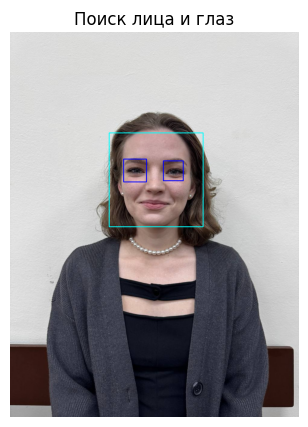

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
 cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)
 face_img = image[y:y + h, x:x + w]
 eye = eye_cascade.detectMultiScale(face_img, 1.3, 5)
 for (ex, ey, ew, eh) in eye:
  cv2.rectangle(image, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0),
2)

plt.figure(figsize=(10, 5)) #размер в дюймах
plt.subplot(1, 2, 1)
plt.title('Поиск лица и глаз')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

Saving я.jpg to я.jpg
Saving photo_2024-11-13_20-13-05.jpg to photo_2024-11-13_20-13-05.jpg
Saving photo_2024-11-13_20-12-32.jpg to photo_2024-11-13_20-12-32.jpg
Saving photo_2024-11-13_20-12-36.jpg to photo_2024-11-13_20-12-36.jpg
Saving азалия.jpg to азалия.jpg


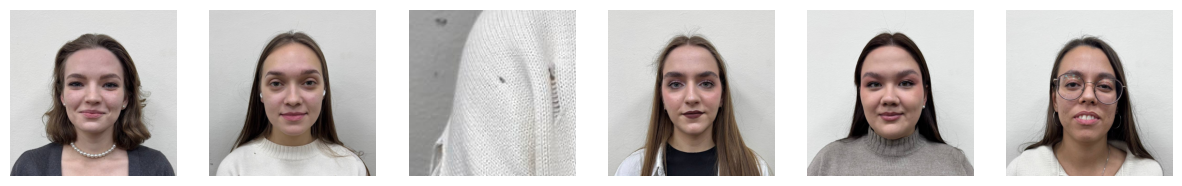

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Функция для извлечения фрагмента изображения
def extract_face_fragment(image):
    # Загружаем каскадный классификатор для обнаружения лиц
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаруживаем лица
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:
        # Вычисляем размеры фрагмента
        fragment_size = (w * 2, h * 2)

        # Определяем координаты фрагмента
        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        # Извлекаем фрагмент
        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

# Загружаем изображения
uploaded = files.upload()

# Список для хранения всех фрагментов
all_fragments = []

# Извлекаем фрагменты для каждого загруженного изображения
for filename in uploaded.keys():
    # Читаем изображение
    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

# Отображаем фрагменты
plt.figure(figsize=(15, 10))
for i, fragment in enumerate(all_fragments):
    plt.subplot(1, len(all_fragments), i + 1)
    plt.imshow(cv2.cvtColor(fragment, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

Saving photo_2024-11-13_20-12-32.jpg to photo_2024-11-13_20-12-32 (1).jpg
Saving photo_2024-11-13_20-12-36.jpg to photo_2024-11-13_20-12-36 (1).jpg
Saving photo_2024-11-13_20-13-05.jpg to photo_2024-11-13_20-13-05 (1).jpg
Saving азалия.jpg to азалия (1).jpg
Saving я.jpg to я (1).jpg


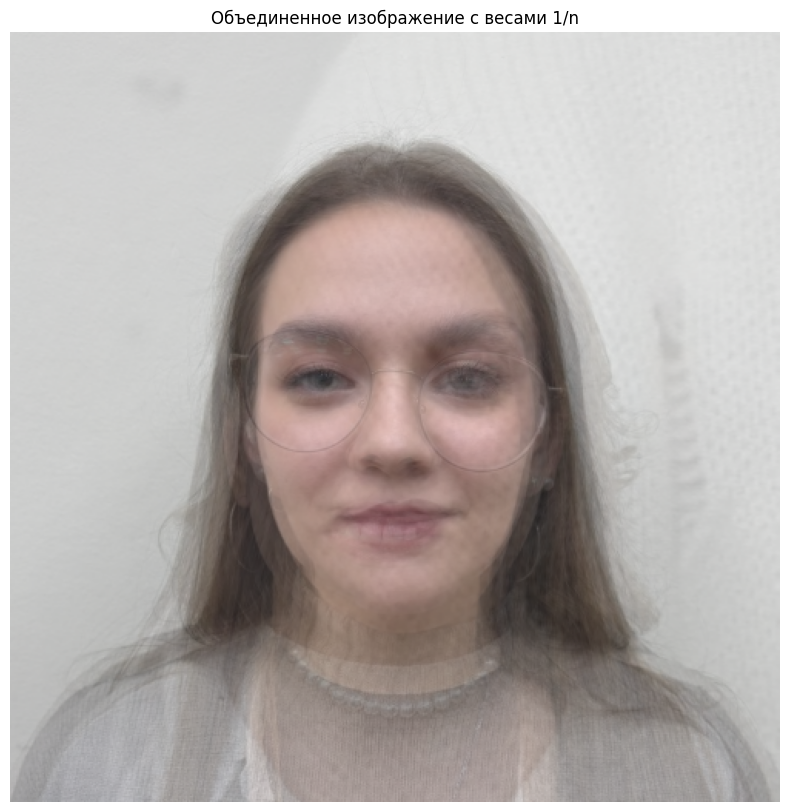

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Функция для извлечения фрагмента изображения
def extract_face_fragment(image):
    # Загружаем каскадный классификатор для обнаружения лиц
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Обнаруживаем лица
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    fragments = []

    for (x, y, w, h) in faces:
        # Вычисляем размеры фрагмента
        fragment_size = (w * 2, h * 2)

        # Определяем координаты фрагмента
        x_center = x + w // 2
        y_center = y + h // 2

        x_start = max(0, x_center - fragment_size[0] // 2)
        y_start = max(0, y_center - fragment_size[1] // 2)

        x_end = min(image.shape[1], x_center + fragment_size[0] // 2)
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2)

        # Извлекаем фрагмент
        fragment = image[y_start:y_end, x_start:x_end]
        fragments.append(fragment)

    return fragments

# Загружаем изображения
uploaded = files.upload()

# Список для хранения всех фрагментов
all_fragments = []

# Извлекаем фрагменты для каждого загруженного изображения
for filename in uploaded.keys():
    # Читаем изображение
    image = cv2.imread(filename)
    fragments = extract_face_fragment(image)
    all_fragments.extend(fragments)

# Изменяем размеры фрагментов, чтобы они совпадали
target_size = (500, 500)  # Задайте желаемый размер (ширина, высота)
resized_fragments = [cv2.resize(fragment, target_size) for fragment in all_fragments]

# Сложение всех изображений с весом 1/n
n = len(resized_fragments)
combined_image = np.zeros_like(resized_fragments[0], dtype=np.float32)  # Создаем пустое изображение для сложения

for fragment in resized_fragments:
  combined_image += fragment / n  # Сложение с учетом веса

combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)  # Приведение значений к диапазону [0, 255]

# Отображаем объединенное изображение
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Объединенное изображение с весами 1/n")
plt.show()